In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('bdastudents.csv', sep=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,1,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,0,0,0
1,GP,F,17,U,1,T,1,1,at_home,other,...,5,3,3,1,1,3,4,0,0,0
2,GP,F,15,U,0,T,1,1,at_home,other,...,4,3,2,2,3,3,10,1,1,1
3,GP,F,15,U,1,T,4,2,health,services,...,3,2,2,1,1,5,2,2,1,2
4,GP,F,16,U,1,T,3,3,other,other,...,4,3,2,1,2,5,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,1,T,2,3,services,other,...,5,4,2,1,2,5,4,1,1,1
1040,MS,F,18,U,0,T,3,1,teacher,services,...,4,3,4,1,1,1,4,2,2,2
1041,MS,F,18,U,1,T,1,1,other,other,...,1,1,1,1,1,5,6,1,1,1
1042,MS,M,17,U,0,T,3,1,services,services,...,2,4,5,3,4,2,6,1,1,1


2. Quante sono le istanze contenute nel dataset? _______ Il dataset è bilanciato rispetto alle
scuole e ai generi degli studenti analizzati? (punti 1).


1044
Axes(0.125,0.11;0.775x0.77)


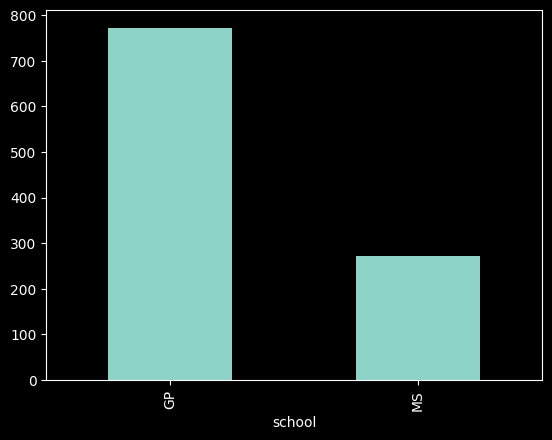

In [7]:
print(df.shape[0])
print(df['school'].value_counts().plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


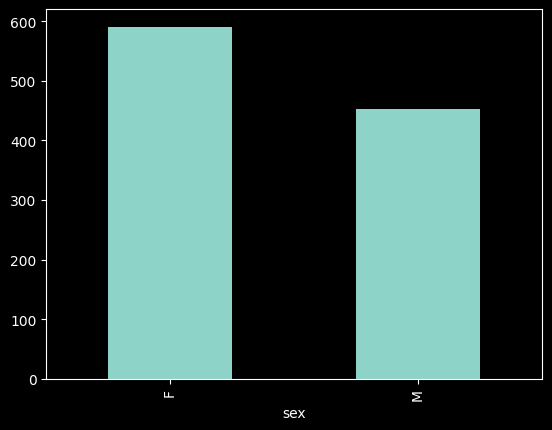

In [8]:
print(df['sex'].value_counts().plot(kind='bar'))

3. Creare un nuovo attributo “GRate” che misuri per ogni studente la differenza tra la
valutazione ricevuta nel primo e nel secondo periodo (punti 2)
Realizzare un grafico che rappresenti per ogni età questa differenza.

<Axes: title={'center': 'Mean GRate by AGE'}, xlabel='age'>

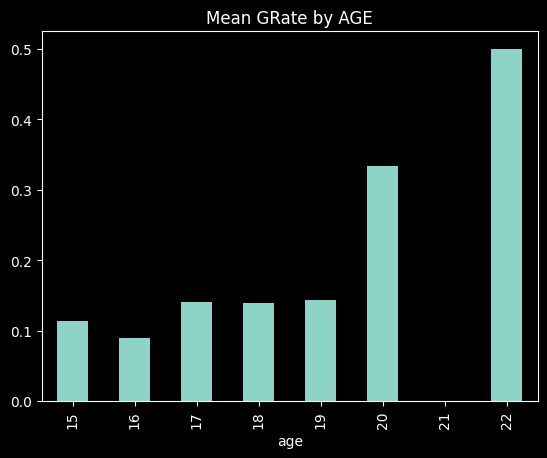

In [24]:
df['GRate'] = np.abs(df['G1'] - df['G2'])
df_age = df.groupby(['age'])['GRate'].mean()
df_age.plot(kind='bar', title='Mean GRate by AGE')

In [25]:
df[df['age']==21]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GRate
392,MS,M,21,R,1,T,1,1,other,other,...,5,3,3,3,3,3,1,1,1,0
802,GP,F,21,U,0,T,4,4,other,other,...,3,2,1,1,5,0,1,1,1,0
808,GP,M,21,R,0,T,1,1,at_home,other,...,3,3,5,2,4,21,1,1,1,0


4. Sono mediamente più bravi (attributo G3) i ragazzi o le ragazze? Esistono delle variazioni
rilevanti nelle due scuole considerate? (punti 2)
_

In [31]:
media_voti_sesso = df.groupby('sex')['G3'].mean()
media_voti_sesso

sex
F    1.123519
M    1.110375
Name: G3, dtype: float64

<Axes: xlabel='school,sex'>

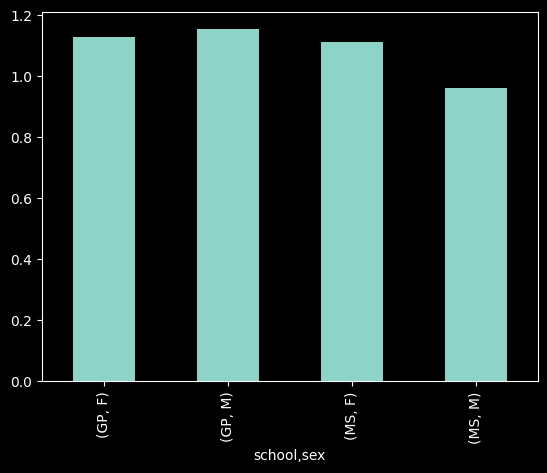

In [33]:
media_voti_scuola_sesso = df.groupby(['school', 'sex'])['G3'].mean()
media_voti_scuola_sesso.plot(kind='bar')

5. Tra i genitori degli studenti considerati, il livello di “educazione” maschile e femminile varia?
Sono generalmente più scolarizzati i padri o le madri? Visualizzare poi un grafico che rappresenti
il concetto (punti 2).


Medu:  2.603448275862069
Fedu): 2.3879310344827585
Madri


<Axes: ylabel='Frequency'>

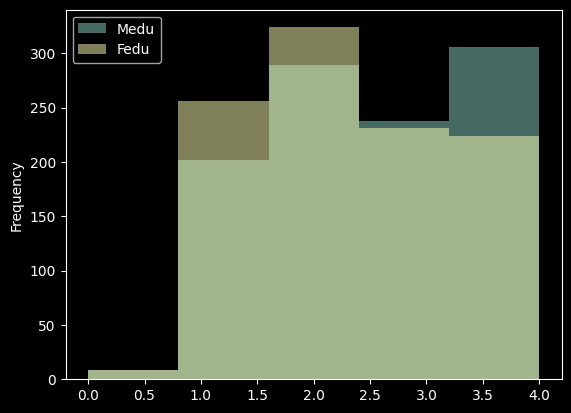

In [39]:
media_madri = df['Medu'].mean()
media_padri = df['Fedu'].mean()

print(f'Medu:  {media_madri}')
print(f'Fedu): {media_padri}')

if media_madri > media_padri:
    print('Madri')
else:
    print('Padri')

df[['Medu', 'Fedu']].plot.hist(alpha=0.5, bins=5)

6. Indicare cosa visualizza l’istruzione
ds["G3"].groupby([ds["G3"],ds["address"]] ).count().plot()
Si tratta di una operazione significativa? (punti 3).


<Axes: xlabel='G3,address'>

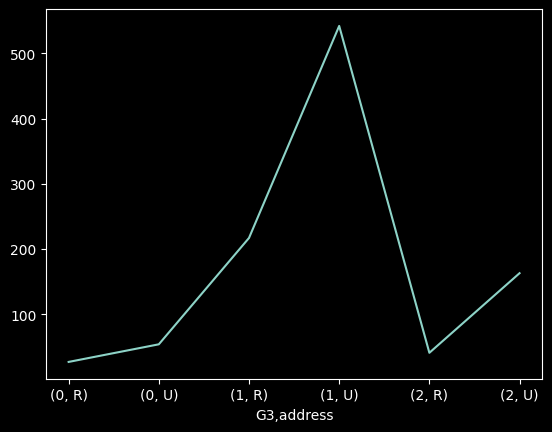

In [40]:
df["G3"].groupby([df["G3"],df["address"]] ).count().plot()


indica quanti studenti che abitano in U o R hanno il g3 0, 1, 2